In [ ]:
# Importing Packages

# import numpy as np
# import pandas as pd
# from PIL import Image
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix, classification_report

# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.optimizers import Adam,Adamax
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation,Dropout,BatchNormalization
# from tensorflow.keras import regularizers

# import seaborn as sns
# sns.set_style('darkgrid')
# import matplotlib.pyplot as plt
# import os
# import time
# import shutil
# import pathlib
# import itertools

# import os
# import pandas as pd
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras import layers, models, optimizers, regularizers
# from tensorflow.keras.applications import InceptionV3
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt



# # Dataset Preparation
# data_dir = "C:/Users/aniru/OneDrive/Desktop/Capstone/Data"
# filepaths = []
# labels = []

# folds = os.listdir(data_dir)
# for fold in folds:
#     foldpath = os.path.join(data_dir, fold)
#     filelist = os.listdir(foldpath)
#     for file in filelist:
#         fpath = os.path.join(foldpath, file)
#         filepaths.append(fpath)
#         labels.append(fold)

# Fseries = pd.Series(filepaths, name='filepaths')
# Lseries = pd.Series(labels, name='labels')
# df = pd.concat([Fseries, Lseries], axis=1)

# df.head()


# # Train-Test Split
# train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['labels'], random_state=42)


# # Data Augmentation
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     zoom_range=0.15,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.15,
#     horizontal_flip=True,
#     fill_mode="nearest"
# )

# test_datagen = ImageDataGenerator(rescale=1./255)

# img_size = (150, 150)
# batch_size = 64

# train_generator = train_datagen.flow_from_dataframe(
#     dataframe=train_df,
#     x_col="filepaths",
#     y_col="labels",
#     target_size=img_size,
#     batch_size=batch_size,
#     class_mode='categorical'
# )

# test_generator = test_datagen.flow_from_dataframe(
#     dataframe=test_df,
#     x_col="filepaths",
#     y_col="labels",
#     target_size=img_size,
#     batch_size=batch_size,
#     class_mode='categorical',
#     shuffle=False
# )








# # Fine-tuned InceptionV3 Model
# def create_inceptionv3_model(input_shape):
#     base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=input_shape)
#     base_model.trainable = True

#     for layer in base_model.layers[:-30]:
#         layer.trainable = False

#     model = models.Sequential([
#         base_model,
#         layers.GlobalAveragePooling2D(),
#         layers.BatchNormalization(),
#         layers.Dense(512, activation='relu'),
#         layers.Dropout(0.3),
#         layers.Dense(256, activation='relu'),
#         layers.Dropout(0.3),
#         layers.Dense(2, activation='softmax', kernel_regularizer=regularizers.l2(0.01))
#     ])
#     return model

# from sklearn.utils.class_weight import compute_class_weight
# import numpy as np

# # Assuming your labels are in y_train
# class_weights = compute_class_weight(class_weight='balanced', classes=np.array([0,1]), y=np.array(train_generator.classes))
# class_weights = dict(enumerate(class_weights))

# print(class_weights)


# from keras.applications import InceptionV3
# from keras import layers, regularizers
# from keras.models import Sequential
# from keras.optimizers import Adam

# # Load the InceptionV3 model with pre-trained ImageNet weights, excluding the top layers
# base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Create the model using Sequential API
# model2 = Sequential()

# # Add the base InceptionV3 model
# model2.add(base_model)

# # Freeze all layers in the base model
# for layer in base_model.layers:
#     layer.trainable = False

# # Unfreeze the last 30 layers
# for layer in base_model.layers[-30:]:
#     layer.trainable = True

# # Add custom layers
# model2.add(layers.GlobalAveragePooling2D())  # Global average pooling to reduce dimensions
# model2.add(layers.BatchNormalization())  # Batch normalization to stabilize learning

# # Add dense layers with LeakyReLU activation and dropout
# model2.add(layers.Dense(256))
# model2.add(layers.LeakyReLU(alpha=0.1))
# model2.add(layers.Dropout(0.5))

# model2.add(layers.Dense(128))
# model2.add(layers.LeakyReLU(alpha=0.1))
# model2.add(layers.Dropout(0.3))

# model2.add(layers.Dense(64))
# model2.add(layers.LeakyReLU(alpha=0.1))
# model2.add(layers.Dropout(0.2))

# # Output layer with 2 units and softmax activation for binary classification
# model2.add(layers.Dense(2, 
#                         activation='softmax',
#                         kernel_regularizer=regularizers.l2(0.01)))

# # Compile the model with Adam optimizer and categorical crossentropy loss
# model2.compile(
#     optimizer=Adam(learning_rate=1e-4),
#     loss='categorical_crossentropy',  # Using categorical crossentropy for multi-class
#     metrics=['accuracy']
# )

# # Model summary to check the architecture
# model2.summary()


# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
#                                patience=5, 
#                                restore_best_weights=True, 
#                                verbose=1)

# history = model2.fit(
#     train_generator,  # The training data generator
#     validation_data=test_generator,  # The validation data generator
#     epochs=30,  # Set the number of epochs
#     batch_size=64,  # Batch size (though this is also managed by the generator)
#     callbacks=[early_stopping],# Use early stopping to prevent overfitting
#     class_weight=class_weights,
#     verbose=1  # Display progress during training
# )

# # Plot training & validation accuracy values
# plt.figure(figsize=(14,5))

# plt.subplot(1,2,1)
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model Accuracy', fontsize=16)
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='lower right')

# # Plot training & validation loss values
# plt.subplot(1,2,2)
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model Loss', fontsize=16)
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper right')

# plt.show()


# # Get the true labels
# true_labels = test_generator.classes

# # Get the class labels (folder names)
# class_labels = list(test_generator.class_indices.keys())

# # Predict the probabilities
# pred_probs = model2.predict(test_generator)
# # Get the predicted class indices
# pred_labels = np.argmax(pred_probs, axis=1)

# # Generate the classification report
# report = classification_report(true_labels, pred_labels, target_names=class_labels)
# print(report)


In [123]:
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import os
import time
import shutil
import pathlib
import itertools

import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.applications import InceptionV3
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [125]:
data_dir = "C:/Users/aniru/OneDrive/Desktop/Capstone/Data"
filepaths = []
labels = []

folds = os.listdir(data_dir)
for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis=1)

df.head()


,filepaths,labels
0,C:/Users/aniru/OneDrive/Desktop/Capstone/Data\...,No
1,C:/Users/aniru/OneDrive/Desktop/Capstone/Data\...,No
2,C:/Users/aniru/OneDrive/Desktop/Capstone/Data\...,No
3,C:/Users/aniru/OneDrive/Desktop/Capstone/Data\...,No
4,C:/Users/aniru/OneDrive/Desktop/Capstone/Data\...,No


In [127]:
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['labels'], random_state=42)


In [129]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_datagen = ImageDataGenerator(rescale=1./255)

img_size = (150, 150)
batch_size = 64

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="filepaths",
    y_col="labels",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="filepaths",
    y_col="labels",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 808 validated image filenames belonging to 2 classes.
Found 203 validated image filenames belonging to 2 classes.


In [133]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(class_weight='balanced', classes=np.array([0,1]), y=np.array(train_generator.classes))
class_weights = dict(enumerate(class_weights))

print(class_weights)


{0: 1.9330143540669857, 1: 0.674457429048414}


In [135]:
from keras.applications import InceptionV3
from keras import layers, regularizers
from keras.models import Sequential
from keras.optimizers import Adam

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model2 = Sequential()

model2.add(base_model)

for layer in base_model.layers:
    layer.trainable = False

for layer in base_model.layers[-30:]:
    layer.trainable = True

model2.add(layers.GlobalAveragePooling2D())
model2.add(layers.BatchNormalization())

model2.add(layers.Dense(256))
model2.add(layers.LeakyReLU(alpha=0.1))
model2.add(layers.Dropout(0.5))

model2.add(layers.Dense(128))
model2.add(layers.LeakyReLU(alpha=0.1))
model2.add(layers.Dropout(0.3))

model2.add(layers.Dense(64))
model2.add(layers.LeakyReLU(alpha=0.1))
model2.add(layers.Dropout(0.2))

model2.add(layers.Dense(2, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

model2.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model2.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_6   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 batch_normalization_664 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 dense_24 (Dense)            (None, 256)               524544    
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 256)               0         
                                                                 
 dropout_18 (Dropout)        (None, 256)              

In [145]:
steps_per_epoch = int( np.ceil(train_df.shape[0] / batch_size) )
steps_per_epoch

13

In [137]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                               patience=5, 
                               restore_best_weights=True, 
                               verbose=1)

history = model2.fit(
    train_generator,
    validation_data=test_generator,
    epochs=30,
    batch_size=64,
    callbacks=[early_stopping],
    class_weight=class_weights,
    verbose=1
)


Epoch 1/30
13/13 [==============================] - 10s 489ms/step - loss: 1.0623 - accuracy: 0.5631 - val_loss: 0.6663 - val_accuracy: 0.6305
Epoch 2/30
13/13 [==============================] - 5s 368ms/step - loss: 0.9085 - accuracy: 0.5693 - val_loss: 0.6505 - val_accuracy: 0.6798
Epoch 3/30
13/13 [==============================] - 5s 398ms/step - loss: 0.8134 - accuracy: 0.6052 - val_loss: 0.6215 - val_accuracy: 0.7192
Epoch 4/30
13/13 [==============================] - 5s 403ms/step - loss: 0.8212 - accuracy: 0.5891 - val_loss: 0.5834 - val_accuracy: 0.7192
Epoch 5/30
13/13 [==============================] - 5s 395ms/step - loss: 0.7969 - accuracy: 0.5928 - val_loss: 0.5575 - val_accuracy: 0.7291
Epoch 6/30
13/13 [==============================] - 5s 380ms/step - loss: 0.7117 - accuracy: 0.6770 - val_loss: 0.5512 - val_accuracy: 0.7291
Epoch 7/30
13/13 [==============================] - 5s 374ms/step - loss: 0.6766 - accuracy: 0.6745 - val_loss: 0.5486 - val_accuracy: 0.6995
Epoch

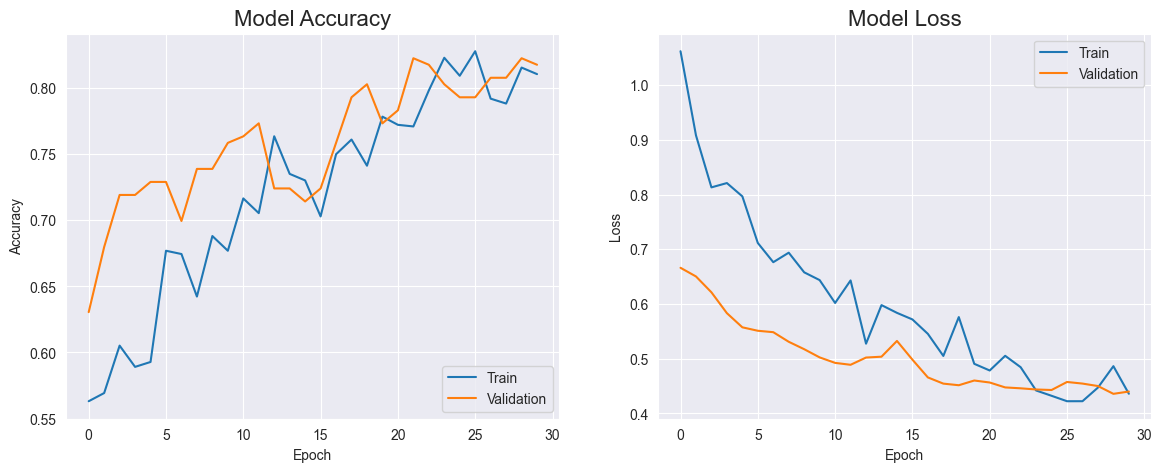

In [138]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=16)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontsize=16)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()


In [139]:
true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

pred_probs = model2.predict(test_generator)
pred_labels = np.argmax(pred_probs, axis=1)

report = classification_report(true_labels, pred_labels, target_names=class_labels)
print(report)


4/4 [==============================] - 2s 178ms/step
              precision    recall  f1-score   support

          No       0.61      0.83      0.70        53
         Yes       0.93      0.81      0.87       150

    accuracy                           0.82       203
   macro avg       0.77      0.82      0.79       203
weighted avg       0.85      0.82      0.83       203

